In [1]:
# !pip install kagglehub
# !pip install sidetable
# !pip install kaggle --user
# !pip install kagglehub --user

## 1. Importing Libraries

In [2]:
import pandas as pd

import seaborn as sns

import os
import matplotlib.pyplot as plt

import numpy as np
import sidetable

import seaborn as sns

In [3]:
# Authenticating Kaggle for downloading the data
import kaggle
import kagglehub
from kaggle.api.kaggle_api_extended import KaggleApi
# Step 1: Authenticate with Kaggle
api = KaggleApi()
api.authenticate()

In [4]:
%matplotlib inline 

In [5]:
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

## 2. Data
Data Columns Means
<ul>
<li>Age--------------> Age of customer(Old/Middle/Young)</li>
<li>Gender -------------->Gender (Male/ Female)</li>
<li>OwnHome -------------->Whether customer owns home (Own/Rent)</li>
<li>Married ------------> Married (Müşteri Evli plup olmadığı)(single/married)</li> 
<li>Location -------------> In terms of distance to the nearest brick and mortar store that sells similar products(Far/ Close)</li>
<li>Salary --------->Yearly salary of customer in dollars</li>
<li>Children ------->Number of children (0-3)</li>
<li>History -----> History of previous purchase volume (low/medium/high/NA NA means that this customer has not yet purchased)</li>
<li>Catalogs ----------->Number of catalogs sent</li>
<li>AmountSpent ------> Amount Spent in dollars</li>
</ul>

In [6]:
dataset = "yoghurtpatil/direct-marketing"
output_dir = 'C://Users//40101410//OneDrive - Anheuser-Busch InBev//Upskill2024//direct-marketing//data'
os.makedirs(output_dir, exist_ok=True)
api.dataset_download_files(dataset, path=output_dir, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/yoghurtpatil/direct-marketing


In [7]:
csv_path = os.path.join(output_dir, 'DirectMarketing' + '.' + 'csv')
csv_path 

'C://Users//40101410//OneDrive - Anheuser-Busch InBev//Upskill2024//direct-marketing//data\\DirectMarketing.csv'

In [8]:
def read_data_from_csv(csv_path):
    """Reads data from a csv file.
    
        Arg:
         csv_path: The path to the csv file.
        
        Returns:
         A pandas DataFrame, or None or error     
    """
    try:
        df = pd.read_csv(csv_path)
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {csv_path}")
        return None
    except pd.errors.ParserError:
        print(f"Error parsing CSV. check the file format")
        return None
    except Exception as e:
        print(f"An unexpected error occured {e}")
        return None
    

df = read_data_from_csv(csv_path) 
    
    

## 3. EDA

In [9]:
# check the number of rows and columns in data
nrow , ncol = df.shape
nrow , ncol

(1000, 10)

In [10]:
# find missing values in each column
df.stb.missing()

,missing,total,percent
History,303,1000,30.3
Age,0,1000,0.0
Gender,0,1000,0.0
OwnHome,0,1000,0.0
Married,0,1000,0.0
Location,0,1000,0.0
Salary,0,1000,0.0
Children,0,1000,0.0
Catalogs,0,1000,0.0
AmountSpent,0,1000,0.0


In [11]:
# name of the columns with there characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   int64 
 7   History      697 non-null    object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [12]:
# Duplicated data
df[df.duplicated() == True]

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent


Summary
1. Data has only objects and integer values
2. We donot have missing data. Only missing values are in History column, which are people who haven't bought in past
3. Dataset comprises of 1000 observations and 10 columns
4. No duplicates


### Categorical Variables

In [13]:
df['Children'].unique()

array([0, 1, 3, 2], dtype=int64)

In [14]:
df['Catalogs'].unique()

array([ 6, 18, 12, 24], dtype=int64)

In [15]:
df['History'].unique()

array(['High', 'Low', 'Medium', nan], dtype=object)

In [16]:
df['History'] = df['History'].fillna("None")
df['History'].unique()

array(['High', 'Low', 'Medium', 'None'], dtype=object)

In [17]:
df['History'].value_counts()

None      303
High      255
Low       230
Medium    212
Name: History, dtype: int64

In [18]:
# Change number of Children
df = df.astype({'Children': 'object', 'Catalogs': 'object'})


In [19]:
categorical_variables  = df.select_dtypes(include=['object']).columns
categorical_variables

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Children',
       'History', 'Catalogs'],
      dtype='object')

In [20]:
# Unique Value
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Age': ['Old', 'Middle', 'Young'],
 'Gender': ['Female', 'Male'],
 'OwnHome': ['Own', 'Rent'],
 'Married': ['Single', 'Married'],
 'Location': ['Far', 'Close'],
 'Children': [0, 1, 3, 2],
 'History': ['High', 'Low', 'Medium', 'None'],
 'Catalogs': [6, 18, 12, 24]}

Age
Middle    50.8
Young     28.7
Old       20.5
Name: Age, dtype: float64 



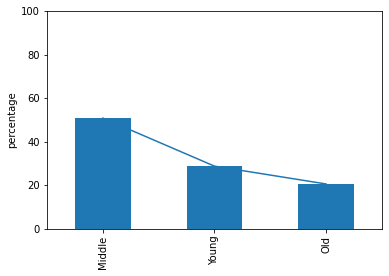

Gender
Female    50.6
Male      49.4
Name: Gender, dtype: float64 



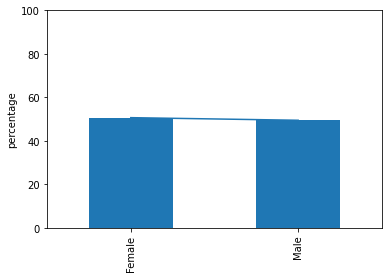

OwnHome
Own     51.6
Rent    48.4
Name: OwnHome, dtype: float64 



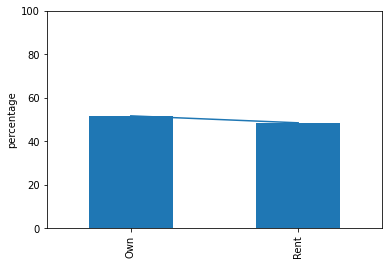

Married
Married    50.2
Single     49.8
Name: Married, dtype: float64 



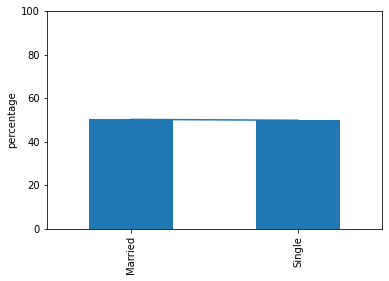

Location
Close    71.0
Far      29.0
Name: Location, dtype: float64 



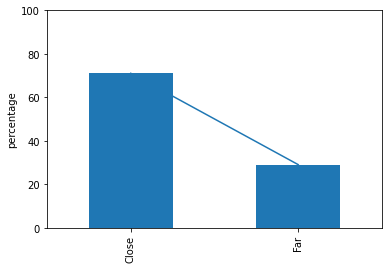

Children
0    46.2
1    26.7
2    14.6
3    12.5
Name: Children, dtype: float64 



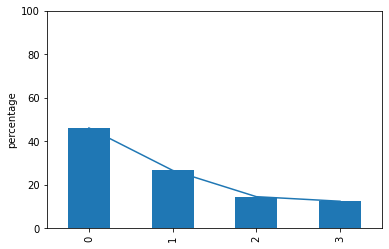

History
None      30.3
High      25.5
Low       23.0
Medium    21.2
Name: History, dtype: float64 



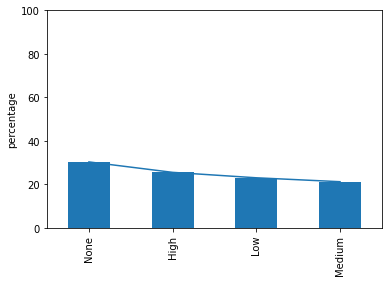

Catalogs
12    28.2
6     25.2
18    23.3
24    23.3
Name: Catalogs, dtype: float64 



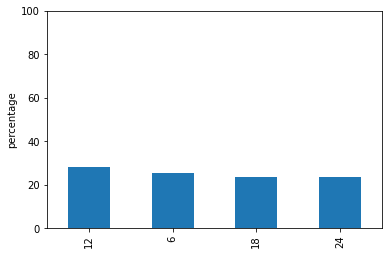

In [21]:
# print percentage of values of count of unique values for all categorical variables
for var in categorical_variables:
    print(f"\033[1m{var}\033[0m")
    var_count_dist = round(df[var].value_counts(normalize = True) * 100,1)
    print(var_count_dist, '\n')
    fig,ax = plt.subplots()
    var_count_dist.plot()
    var_count_dist.plot(ax = ax, kind = 'bar', ylabel = 'percentage', ylim = ([0,100]))
    plt.show()

Summary 

1. Most of the people are in middle ages
2. Equal representation across genders, home owners and marital status
3. More people live close to the store
4. Most people donot have kids
5. Catalog distrubution is balanced
6. 30% people have not purchased in the past

#### Numeric Variables

In [22]:
numeric_variables = df.select_dtypes(include=['int64']).columns
numeric_variables

Index(['Salary', 'AmountSpent'], dtype='object')

In [23]:
# Data summary
round(df.describe(),1).T

,count,mean,std,min,25%,50%,75%,max
Salary,1000.0,56103.9,30616.3,10100.0,29975.0,53700.0,77025.0,168800.0
AmountSpent,1000.0,1216.8,961.1,38.0,488.2,962.0,1688.5,6217.0


Salary


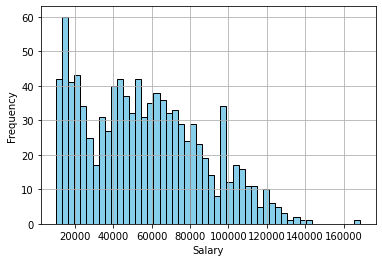

AmountSpent


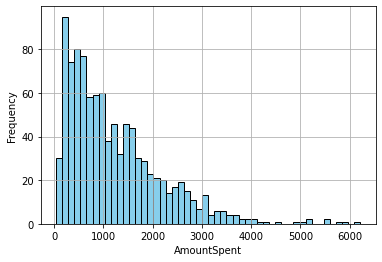

In [24]:
# distribution of amount spent
for var in numeric_variables:
    print(f"\033[1m{var}\033[0m")
    fig,ax = plt.subplots()
    plt.hist(df[var], bins=50, color='skyblue', edgecolor='black')
    # Add gridlines
    plt.grid(True)

    # Add titles and labels
    plt.xlabel(var)
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()
    

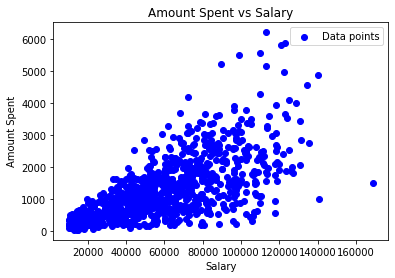

In [25]:
# Scatter plot
plt.scatter(x= df['Salary'], y = df['AmountSpent'], color='blue', label='Data points')

# Add titles and labels
plt.title('Amount Spent vs Salary')

plt.xlabel('Salary')
plt.ylabel('Amount Spent')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [26]:
print("\\033[1m Correlation Matrix\\033[0m")
round(df.corr(),2)

\033 Correlation Matrix\033


,Salary,AmountSpent
Salary,1.0,0.7
AmountSpent,0.7,1.0


<AxesSubplot:>

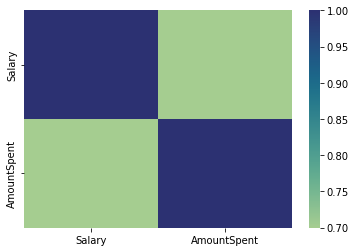

In [27]:
sns.heatmap(df.corr(), cmap = "crest")

1. Salary and amouunt spent are correlated
2. Average amount spent is a small fraction of salary


In [28]:
numeric_variables

Index(['Salary', 'AmountSpent'], dtype='object')

In [29]:
for i in range(0,len(numeric_variables)):
    print(i)

0
1


In [30]:
df[numeric_variables[0]]

0      47500
1      63600
2      13500
3      85600
4      68400
       ...  
995    19400
996    40500
997    44800
998    79000
999    53600
Name: Salary, Length: 1000, dtype: int64

In [31]:
#### Function to check average of all continuous variables across each of the categorical variables
def relation_variable(cat_var, cts_var):
    """
    See how continuous variables like amount spent, salary, etc. changes with age, gender, and other categorical variables
    
    Arg:
    cts_var : Continuous Vaiable
    cat_var: Categroical Variable
    """
    
    avg = df.groupby(by = cat_var)[cts_var].mean().round(1).reset_index()
    avg = avg.rename(columns={c: 'avg_' + c for c in avg.columns if c != cat_var})
    print(avg)
    
    
    # Create subplots (1 row, columns = number of continuous variables)
    rows = 1
    cols = len(cts_var)
    fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
    
    # Flatten axes for easy iteration (handles grids of 1 row/1 column)
    axes = axes.flatten()
    
    # Plot data dynamically
    for i in range(0, cols):
        sns.kdeplot(data = df, x = cts_var[i], ax=axes[i], fill=True, alpha=0.5, hue = cat_var)
        axes[i].set_title(cts_var[i])
         
    # Display the plots
    plt.tight_layout()  # Adjust layout to prevent overlap
#     plt.title("Density Plot by" + var)
    plt.show()
   

    
 

Age
      Age  avg_Salary  avg_AmountSpent
0  Middle     72036.4           1501.7
1     Old     56365.9           1432.1
2   Young     27715.7            558.6


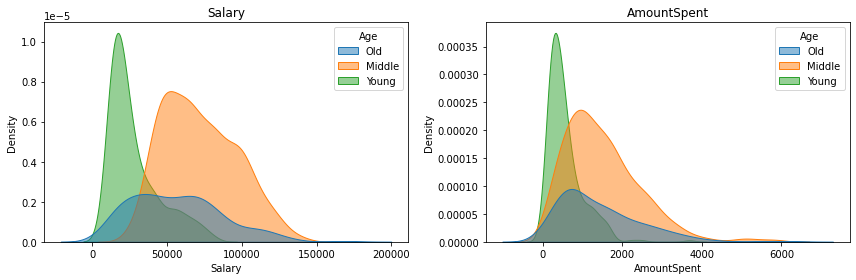

Gender
   Gender  avg_Salary  avg_AmountSpent
0  Female     48197.4           1025.3
1    Male     64202.4           1412.9


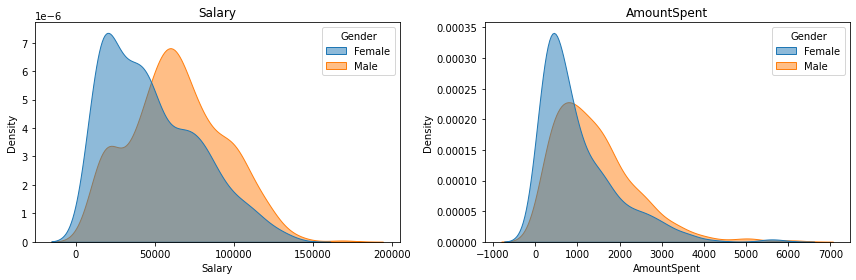

OwnHome
  OwnHome  avg_Salary  avg_AmountSpent
0     Own     69758.7           1543.1
1    Rent     41546.3            868.8


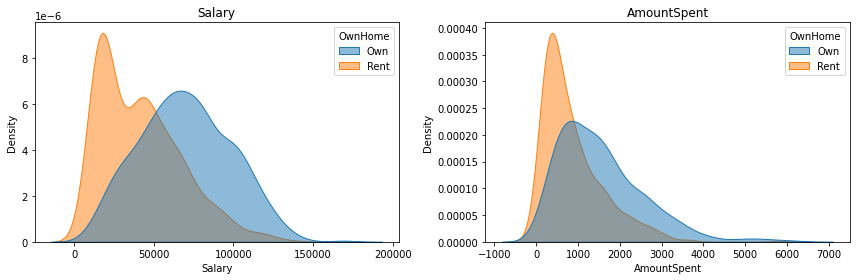

Married
   Married  avg_Salary  avg_AmountSpent
0  Married     76696.4           1672.1
1   Single     35346.0            757.8


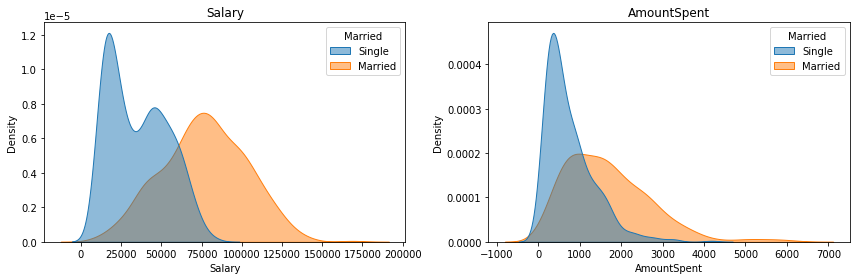

Location
  Location  avg_Salary  avg_AmountSpent
0    Close     56830.0           1061.7
1      Far     54326.2           1596.5


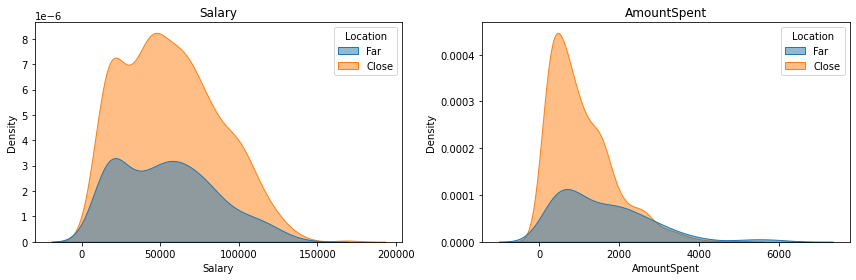

Children
   Children  avg_Salary  avg_AmountSpent
0         0     54896.3           1406.6
1         1     56125.1           1219.5
2         2     56554.8            940.7
3         3     59995.2            831.5


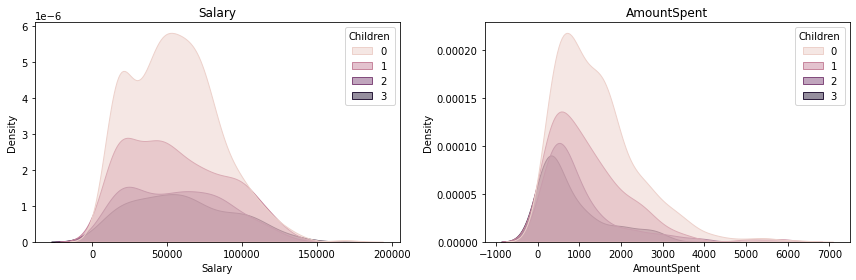

History
  History  avg_Salary  avg_AmountSpent
0    High     83547.8           2186.1
1     Low     32261.3            357.1
2  Medium     55374.1            950.4
3    None     51616.5           1239.9


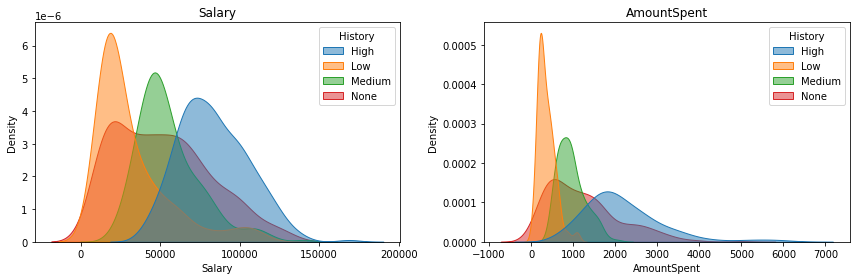

Catalogs
   Catalogs  avg_Salary  avg_AmountSpent
0         6     46892.1            616.7
1        12     55686.2           1017.9
2        18     60408.2           1495.5
3        24     62268.2           1827.8


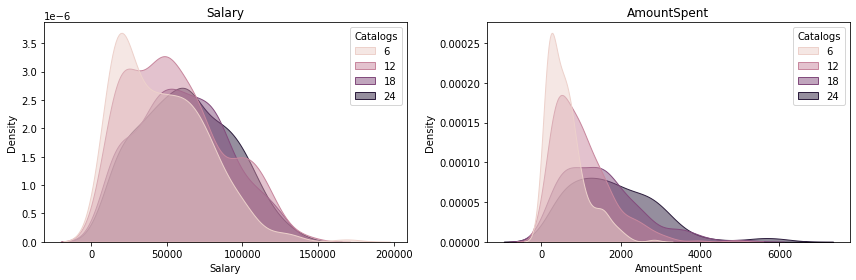

In [32]:
for cat_var in categorical_variables:
    print(f"\033[1m{cat_var}\033[0m")
    relation_variable(cat_var, numeric_variables)

Summary 
1. Middle income earns and spends more
2. Male earn and spends more
3. Consumers who own a house, earn and spend more
4. Married consumers earn and spend more
5. Consumers who are close by earn more but people who come from far, spend more
6. Consumers who have bought higher volume in past earn more than other groups
7. Consumers with no children have lower salaries but spend more
8. Though the salaries across consumers irrespective of children were close the spending of consumers with three children is much lesser
9. Consumers who have bought high volumes in past have higher salaries on an average and spend more
10. The number of catalogs sent increases with income, it also results in increase in expenditure

In [33]:
# Saving data for further pre-processing
df.to_parquet('raw_data.parquet', index=False)

In [34]:
# converting it to a list
categorical_variables =  categorical_variables.tolist()
categorical_variables 

['Age',
 'Gender',
 'OwnHome',
 'Married',
 'Location',
 'Children',
 'History',
 'Catalogs']

In [35]:
# Group with maximum and minimum Salary
# Group by multiple variables
# grouped = df.groupby(categorical)
df.groupby(categorical_variables)['Salary'].agg(['sum', 'mean', 'count']).sort_values(by=['count', 'mean'], ascending=False)

sum  \
Age    Gender OwnHome Married Location Children History Catalogs            
Young  Female Rent    Single  Close    1        Low     6          220600   
Middle Male   Own     Married Close    0        High    24        1041000   
Old    Female Own     Married Close    0        High    18         713000   
Middle Male   Own     Married Close    0        High    18         656700   
Young  Male   Rent    Single  Close    0        Low     12         134000   
...                                                                   ...   
       Female Rent    Single  Close    2        None    18          11000   
                                                        24          10600   
                              Far      2        Low     18          10200   
       Male   Rent    Single  Close    2        None    12          10200   
Old    Female Own     Married Close    1        Low     6           10100   

                                                                          mean  \
Age    Gender OwnHome Married Location Children History Catalogs                 
Young  Female Rent    Single  Close    1        Low     6         15757.142857   
Middle Male   Own     Married Close    0        High    24        86750.000000   
Old    Female Own     Married Close    0        High    18        89125.000000   
Middle Male   Own     Married Close    0        High    18        93814.285714   
Young  Male   Rent    Single  Close    0        Low     12        19142.857143   
...                                                                        ...   
       Female Rent    Single  Close    2        None    18        11000.000000   
                                                        24        10600.000000   
                              Far      2        Low     18        10200.000000   
       Male   Rent    Single  Close    2        None    12        10200.000000   
Old    Female Own     Married Close    1        Low     6         10100.000000   

                                                                  count  
Age    Gender OwnHome Married Location Children History Catalogs         
Young  Female Rent    Single  Close    1        Low     6            14  
Middle Male   Own     Married Close    0        High    24           12  
Old    Female Own     Married Close    0        High    18            8  
Middle Male   Own     Married Close    0        High    18            7  
Young  Male   Rent    Single  Close    0        Low     12            7  
...                                                                 ...  
       Female Rent    Single  Close    2        None    18            1  
                                                        24            1  
                              Far      2        Low     18            1  
       Male   Rent    Single  Close    2        None    12            1  
Old    Female Own     Married Close    1        Low     6             1  

[578 rows x 3 columns]

In [36]:
# Given that most of the groups have very few people bucketing based on demographics looking at smaller distribution
round(df.groupby(['Age', 'Gender'])['Salary'].agg(['max', 'min', 'mean', 'count']),1).sort_values(by=['mean', 'count'], ascending=False)

max    min     mean  count
Age    Gender                               
Middle Male    140700  34200  76298.7    302
Old    Male    168800  15400  66807.9     76
Middle Female  135700  25300  65787.9    206
Old    Female  128700  10100  50214.0    129
Young  Male     80700  10200  31003.4    116
       Female   79400  10200  25485.4    171

In [37]:
# Given that most of the groups have very few people bucketing based on demographics looking at smaller distribution
round(df.groupby(['Age', 'Gender'])['AmountSpent'].agg(['max', 'min', 'mean', 'count']),1).sort_values(by=['mean', 'count'], ascending=False)

max  min    mean  count
Age    Gender                          
Old    Male    6217  297  1691.5     76
Middle Male    5878  157  1638.4    302
       Female  5830  158  1301.3    206
Old    Female  5564   65  1279.3    129
Young  Male    1692   38   643.2    116
       Female  3688   47   501.3    171

In [38]:
# Demographic of people who have purchased high volume in past
df_high_history = df[df['History'] == 'High']
df_high_history.shape

(255, 10)

In [39]:
round(df_high_history.groupby(['Gender', 'Age'])['AmountSpent'].agg(['max', 'min', 'mean', 'count']),1).sort_values(by=['mean', 'count'], ascending=False)

max   min    mean  count
Gender Age                              
Male   Old     6217   741  2296.3     36
Female Old     5564   565  2262.8     45
       Middle  5830   847  2189.4     45
       Young   3688   979  2167.5      4
Male   Middle  5878   701  2144.8    122
       Young   1690  1084  1374.0      3

In [40]:
df_high_history['AmountSpent'].sum()/df['AmountSpent'].sum()

0.45815149946168954

In [41]:
# Demographic of people who have purchased high volume in past
df_high_history = df[df['History'] == 'None']
df_high_history.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
9,Old,Male,Own,Married,Far,80700,0,None,18,3034
10,Young,Male,Rent,Married,Close,43700,1,None,12,927
15,Middle,Female,Own,Married,Far,83100,1,None,12,2766
24,Young,Female,Rent,Married,Close,41700,1,None,6,521
26,Middle,Male,Own,Single,Close,62800,3,None,6,707


Summary
1. Men in middle age group earn most while old men spend the most amount
2. Young females earn and spend the least amount
3. Old men and women are the conusmers who have bought most volume in past 
